<strong><b><font size="5">UNIPE</font></b></strong>

<strong><b><font size="5">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="5">Lab 1</font></b></strong>

<strong><b><font size="4">Scraping, Processamento de Linguagem Natural e Análise de Dados em Portais de Vagas no Brasil</font></b></strong>

![title](imagens/lab1.png)

Neste Lab iremos conectar em um dos maiores portais de vagas do Brasil, o Indeed, fazer web scraping de dados sobre as vagas em Data Science e então analisar os dados, extraindo insights e aplicando Processamento de Linguagem Natural. O exemplo pode ser facilmente aplicado a outros portais, com os devidos ajustes.

Usaremos o Chromedriver para o processo de extração. Acesse o endereço abaixo, faça o download do arquivo de acordo com seu sistema operacional, descompacte o zip e coloque o arquivo na mesma pasta onde está este Jupyter Notebook.

https://sites.google.com/a/chromium.org/chromedriver/home

Execute cada uma das células, leia os comentários, estude o código e faça modificações para customizar o Lab.

## Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [3]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [4]:
# Precisaremos do selenium
!pip install -q selenium

In [5]:
# Imports
import bs4
import selenium
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [6]:
# Com o NLTK fazemos Processamento de Linguagem Natural
import nltk

In [7]:
# Temos que fazer o download do dicionário e demais pacotes do NLTK
# Vai abrir outra janela do navegador solicitando a seleção dos itens para download. 
# Selecione todos os itens com o mouse e então clique em Download. Feche a janela quando terminar.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
# Tokenização é o processo de quebrar uma sentença em palavras, por exemplo.
# Essa tarefa faz parte do processamento de linguagem natural. 
# Vamos importar a função word_tokenize.
from nltk import word_tokenize

In [9]:
# As stopwords são palavras comuns, como artigos, advérbios ou conjunções.
# As stopwords devem ser removidas no processamento de linguagem natural.
# Vamos importar a função stopwords.
from nltk.corpus import stopwords

In [10]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

selenium.webdriver 3.14.1
numpy              1.18.5
bs4                4.8.2
nltk               3.4.5
pandas             1.0.4
selenium           3.141.0
matplotlib         3.2.1
Data Science Academy


## Web Scraping

In [11]:
# Cria o driver de conexão. Será aberta outra janela do navegador. Não feche-a e mantenha aberta durante a extração.
driver = webdriver.Chrome("./chromedriver")

In [12]:
# Cria o dataframe para receber os dados
dados = pd.DataFrame(columns = ["Titulo", "Localidade", "Empresa", "Salario", "Tipo_Pesquisa", "Desc"])

A url abaixo foi gerada da seguinte forma:
    
- 1- Acesso ao site https://www.indeed.com.br

- 2- Seleção dos filtros de pesquisa de vagas com o termo "Data Science" e localidade "Brasil"

- 3- Então copiamos a url na barra de endereço do navegador.

Você pode executar o mesmo procedimento e customizar sua busca, alterando localidade ou o tipo de vaga por exemplo. Copie a url e coloque na célula abaixo. Então execute o Jupyter Notebook novamente.

Evite executar a célula abaixo muitas vezes seguidas ou seu acesso pode ser bloqueado pelo site.

In [13]:
# Abre a conexão com o site e faz a pesquisa
driver.get("https://www.indeed.com.br/jobs?q=data+science&l=brasil")
driver.implicitly_wait(15)

In [14]:
# Gravamos o resultado do scraping
resultado = driver.find_elements_by_class_name("result")

In [15]:
# Tipo do objeto
type(resultado)

list

In [16]:
# Temos apenas os elementos web. Precisamos agora extrair o texto desses elementos
resultado

[<selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="818de106-e83d-4d59-b93f-36202b4ee714")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="d1137413-08bd-4aee-9137-3f6f86c23f07")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="e1a68b96-13a3-4d92-8169-d6d2d62da09a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="f3c3f776-c5fa-4144-994f-58ab95e67869")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="ce8640d6-5f0a-495d-9fe0-a30a9e2279e5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="1551697f-fcbf-4b91-97d7-0f43575afa34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b8cfe5037499d3aec560abc1a765cbc4", element="d923da3a-f1a7-47d7-abbc-9f

Agora extraímos os dados do nosso interesse.

In [17]:
# Loop pelos resultados do scraping e extração dos dados nas tags HTML do nosso interesse
for vaga in resultado:
    
    # Primeiro coletamos o elemento HTML interno
    result_html = vaga.get_attribute('innerHTML')
    
    # Fazemos então o parser do código HTML
    soup = BeautifulSoup(result_html, 'html.parser')
    
    # Buscamos as tags para análise. 
    # Usaremos blocos try/except para evitar erros na execução, no caso de ua informação não estar disponível na vaga
    
    # Título da vaga
    try:
        title = soup.find("a", class_ = "jobtitle").text.replace('\n', '')
    except:
        title = 'None'
    
    # Localidade
    try:
        location = soup.find(class_ = "location").text
    except:
        location = 'None'
    
    # Empresa
    try:
        company = soup.find(class_ = "company").text.replace('\n', '').strip()
    except:
        company = 'None'
    
    # Salário
    try:
        salary = soup.find("a", class_ = "salary").text.replace('\n', '').strip()
    except:
        salary = 'None'
    
    # Tipo de pesquisa (orgânica ou patrocinada)
    try:
        sponsored = soup.find("a", class_ = "sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = 'Organic'
        
    # Aqui buscamos o sumário
    sum_div = vaga.find_elements_by_class_name("summary")[0]
    sum_div.click()
    
    # Descrição da vaga
    job_desc = driver.find_element_by_id('vjs-desc').text
    
    # Gravamos o resultado em nosso dataframe
    dados = dados.append({"Titulo":title, 
                          "Localidade":location, 
                          "Empresa":company, 
                          "Salario":salary, 
                          "Tipo_Pesquisa":sponsored, 
                          "Desc":job_desc}, 
                         ignore_index = True)

In [18]:
# Shape
dados.shape

(10, 6)

In [19]:
# Visualizamos os dados
dados.head()

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc
0,DATA SCIENCE CONSULTANT SAO PAULO,"São Paulo, SP",managementsolutions,None,Organic,Brazil\n\nDATA SCIENCE CONSULTANT SAO PAULO\n\...
1,Data Science,"São Bernardo do Campo, SP",Atento Corporate,None,Organic,"Cientista de Dados, venha fazer parte da nossa..."
2,Data Science Coordinator,"Curitiba, PR",The Bridge,None,Organic,Multinacional em Curitiba procura Coordenadore...
3,Applied Data Scientist,"São Paulo, SP",dunnhumby,None,Organic,dunnhumby is the world’s leading customer scie...
4,Data Scientist en Vie Brésil (H/F),"São Paulo, SP",Keyrus,None,Organic,Vos missions :\nAccompagner nos clients dans l...


Legal. Temos dados para trabalhar! Vamos salvar em disco para não perder os dados ao fechar o Jupyter Notebook.

In [20]:
# Salvamos os dados em disco
dados.to_csv('resultado/dados.csv', encoding = "utf-8", index = False)

## Análise de Dados

In [21]:
# Carregamos o dataset
df = pd.read_csv("resultado/dados.csv", encoding = "utf-8")

In [22]:
# Shape
df.shape

(10, 6)

In [23]:
# Visualiza os dados
df.head()

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc
0,DATA SCIENCE CONSULTANT SAO PAULO,"São Paulo, SP",managementsolutions,None,Organic,Brazil\n\nDATA SCIENCE CONSULTANT SAO PAULO\n\...
1,Data Science,"São Bernardo do Campo, SP",Atento Corporate,None,Organic,"Cientista de Dados, venha fazer parte da nossa..."
2,Data Science Coordinator,"Curitiba, PR",The Bridge,None,Organic,Multinacional em Curitiba procura Coordenadore...
3,Applied Data Scientist,"São Paulo, SP",dunnhumby,None,Organic,dunnhumby is the world’s leading customer scie...
4,Data Scientist en Vie Brésil (H/F),"São Paulo, SP",Keyrus,None,Organic,Vos missions :\nAccompagner nos clients dans l...


### Tarefa 1: Qual o tipo de vaga mostrado na pesquisa, orgânica ou patrocinada?

In [24]:
# Vamos contar o total de registros por valor da coluna "Tipo_Pesquisa"
df["Tipo_Pesquisa"].value_counts()

Organic    10
Name: Tipo_Pesquisa, dtype: int64

Todas as vagas foram orgânicas.

### Tarefa 2: Quais empresas tem o maior número de vagas listadas?

In [25]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("Empresa").count()["Titulo"].sort_values(ascending = False)[:20]

In [26]:
# Visualiza os dados
grupo1.head()

Empresa
dunnhumby              2
managementsolutions    1
The Bridge             1
Keyrus                 1
DSM                    1
Name: Titulo, dtype: int64

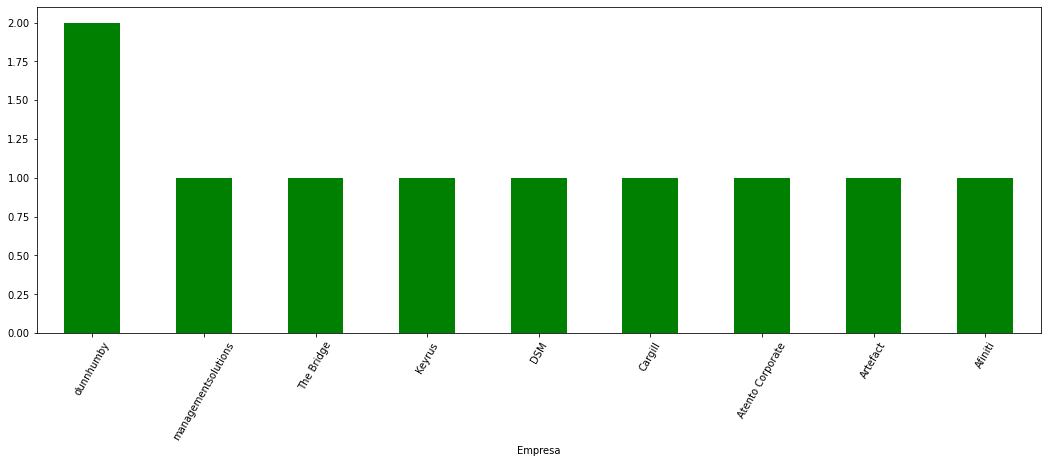

In [27]:
# Gráfico
grupo1.plot(kind = "bar", figsize = (18,6), color = "green", rot = 60)

### Tarefa 3: Qual localidade tem o maior número de vagas listadas?

In [28]:
# Busca localidade com mais vagas
grupo2 = df.groupby("Localidade").count()["Titulo"].sort_values(ascending = False)[:20]

In [29]:
# Visualiza os dados
grupo2.head()

Localidade
São Paulo, SP                7
São Bernardo do Campo, SP    1
Mairinque, SP                1
Curitiba, PR                 1
Name: Titulo, dtype: int64

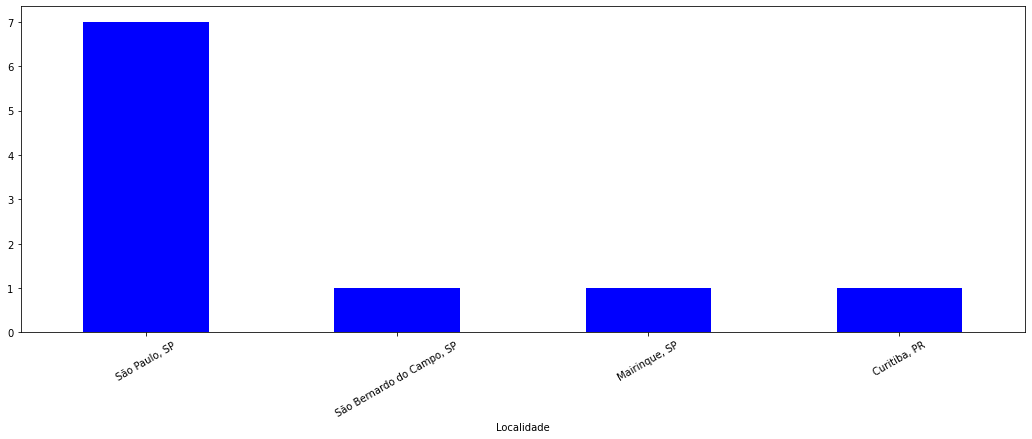

In [30]:
# Gráfico
grupo2.plot(kind = "bar", figsize = (18,6), color = "blue", rot = 30)

### Tarefa 4: Quais os skills mais comuns nas descrições das vagas?

Agora aplicamos Processamento de Linguagem Natural para extrair alguns insights das descrições das vagas.

In [31]:
# Função de limpeza dos dados
def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words_pt]
    desc = [word for word in desc if word not in stop_words_en]
    return desc

In [32]:
# Vamos definir a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

In [33]:
# Vamos definir a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

In [34]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
desc_vagas = df["Desc"].apply(limpa_dados)

In [35]:
# Visualiza os dados
desc_vagas.head()

0    [brazil, data, science, consultant, sao, paulo...
1    [cientista, dados, venha, fazer, parte, equipe...
2    [multinacional, curitiba, procura, coordenador...
3    [dunnhumby, world, leading, customer, science,...
4    [missions, accompagner, clients, dans, formali...
Name: Desc, dtype: object

In [36]:
# Vamos sumarizar as descrições das vagas
desc_itens = desc_vagas.apply(Counter).sum().items()

In [37]:
# Ordenamos o resultado
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

In [38]:
# Criamos uma série
desc_itens_serie = pd.Series({k: v for k, v in desc_itens})

In [39]:
# Visualizamos os dados, com a contagem de palavras mais frequentes nas descrições das vagas
desc_itens_serie.head(15)

data          80
client        30
science       28
work          25
business      23
dunnhumby     23
team          21
clients       21
experience    18
manutenção    18
working       15
best          13
solutions     13
build         13
projects      12
dtype: int64

In [40]:
# Vamos criar uma lista de skills e pesquisar como eles aparecem nas descrições das vagas
# Usamoas as palavras em minúsculo pois ao limpar os dados convertemos tudo para minúsculo
skills = ["python", "statistics", "analytics", "business", "projects", "develop"]

In [41]:
# Filtramos a série com os skills
filtro_skills = desc_itens_serie.filter(items = skills)

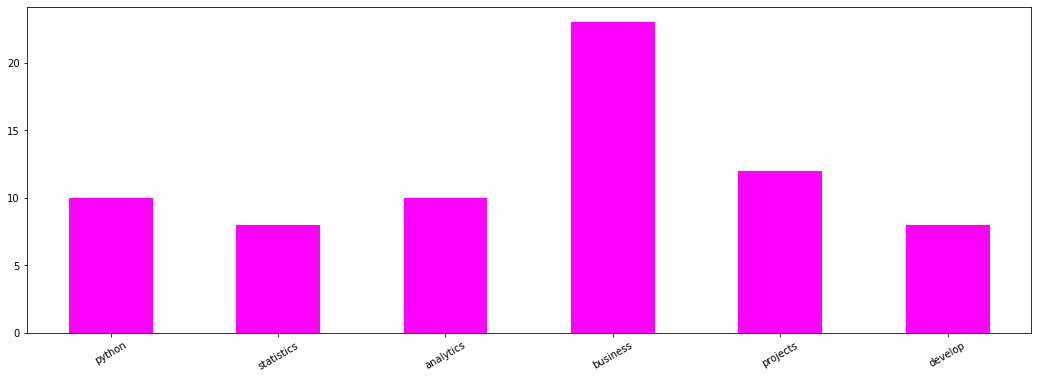

In [42]:
# Criamos o plot
filtro_skills.plot(kind = 'bar', figsize = (18,6), color = "magenta", rot = 30)

A palavra "Python" aparece com frequência em quase todas as vagas, superando a palavra "Estatística" e no mesmo nível da palavra "Analytics". As palavras "projects" e "develop" também aparecem com frequência.

Mas a palavra que aparece com alta frequência nas descrições das vagas é "Business". Por que será?

Daqui em diante é com você. Pesquise por outros termos, aplique outros filtros, crie outros gráficos. Lembre-se que você pode criar diversos arquivos csv com o scraping de diferentes profissões em diferentes cidades e depois concatenar esses arquivos criando um único dataframe, por exemplo. 

Será que uma empresa de recolocação ou setor de RH não gostaria de ter um projeto como esse?

# Fim